In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:

def f(x):
    return x[0] + x[1] - (x[2] + x[3]) + x[4] + x[5] - (x[6] + x[7])

def croise_cross_percent(X, p):
    i, j = np.random.choice(len(X), size=2, replace=False)
    f1, f2 = X[i].copy(), X[j].copy()
    
    nb_cross = int(p * (len(X[0]) - 1))
    cross_index_list = sorted(np.random.choice(range(1, len(X[0]) - 1), size=nb_cross, replace=False).tolist())
    
    change = False
    for k in range(len(X[0])):
        if k in cross_index_list:
            change = not change
        if change:
            f1[k], f2[k] = f2[k], f1[k]
      
    X.append(f1)
    X.append(f2)

def mutation(X):
    element_index = np.random.randint(len(X))
    gene_index = np.random.randint(len(X[0]))
    old_gen = X[element_index][gene_index]
    new_gen = np.random.randint(0, 10)
    X[element_index][gene_index] = new_gen
    print(f"Mutation in x[{element_index}] at gene index {gene_index}: {old_gen} -> {new_gen}")

def mutation_percent(X, p):
    num_mutations = int(p * len(X))
    indices_to_mutate = np.random.choice(len(X), size=num_mutations, replace=False)
    for i in indices_to_mutate:
        mutation(X)

def get_vector_objectif_fX(X):
    return [f(x) for x in X]

def get_objectif_moyen(X):
    vo = get_vector_objectif_fX(X)
    return np.mean(vo)

def classer_sur_f_objectif(X):
    fX = get_vector_objectif_fX(X)
    X_sorted = [x for _, x in sorted(zip(fX, X), key=lambda pair: pair[0], reverse=True)]
    X[:] = X_sorted

def take_first_n(X, n):
    if len(X) > n:
        X[:] = X[:n]

def remove_duplicates(X):
    # Convert each numpy array to a tuple and create a set to remove duplicates
    unique_arrays = list({tuple(arr): arr for arr in X}.values())
    # Update X with the unique arrays
    X[:] = unique_arrays  # This updates the original list


def affiche_graph(y):
    n = np.arange(1, len(y) + 1)
    plt.figure(figsize=(8, 4))
    plt.plot(n, y, label="Variation du objectif moyenne")
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Objectif Moyenne")
    plt.title("Variation du objectif moyenne ou courbe de l'avancement")
    plt.show()
    
def algorithm_genetic(X, nb_iteration, nb_population, cross_over_p, mutation_p):
    list_objectif_moyen = []
    for i in range(nb_iteration):
        croise_cross_percent(X, cross_over_p)
        mutation_percent(X, mutation_p)
        classer_sur_f_objectif(X)
        
        list_objectif_moyen.append(get_objectif_moyen(X))
        remove_duplicates(X)
        take_first_n(X, nb_population)
        
    affiche_graph( list_objectif_moyen)
    print('Process complete!')


In [168]:

X = [np.random.randint(0, 10, size=8) for _ in range(10)]
# X=[
#     [6,5,4,1,3,5,3,2],
#     [8,7,1,2,6,6,0,1],
#     [2,3,9,2,1,2,8,5],
#     [4,1,8,5,2,0,9,4]
# ]
#X

Mutation in x[6] at gene index 1: 9 -> 5
Mutation in x[5] at gene index 2: 3 -> 3
Mutation in x[3] at gene index 2: 8 -> 7
Mutation in x[1] at gene index 3: 4 -> 4
Mutation in x[2] at gene index 3: 4 -> 7
Mutation in x[0] at gene index 7: 0 -> 2
Mutation in x[2] at gene index 0: 7 -> 4
Mutation in x[2] at gene index 0: 7 -> 6
Mutation in x[4] at gene index 4: 5 -> 3
Mutation in x[4] at gene index 7: 0 -> 6
Mutation in x[3] at gene index 4: 5 -> 8
Mutation in x[0] at gene index 6: 5 -> 4
Mutation in x[1] at gene index 4: 8 -> 8
Mutation in x[1] at gene index 3: 1 -> 6
Mutation in x[0] at gene index 2: 0 -> 9
Mutation in x[3] at gene index 7: 2 -> 4
Mutation in x[4] at gene index 1: 4 -> 8
Mutation in x[4] at gene index 3: 1 -> 4
Mutation in x[3] at gene index 2: 0 -> 6
Mutation in x[0] at gene index 6: 4 -> 5
Mutation in x[3] at gene index 1: 4 -> 7
Mutation in x[0] at gene index 2: 0 -> 7
Mutation in x[3] at gene index 6: 5 -> 9
Mutation in x[0] at gene index 0: 7 -> 2
Mutation in x[3]

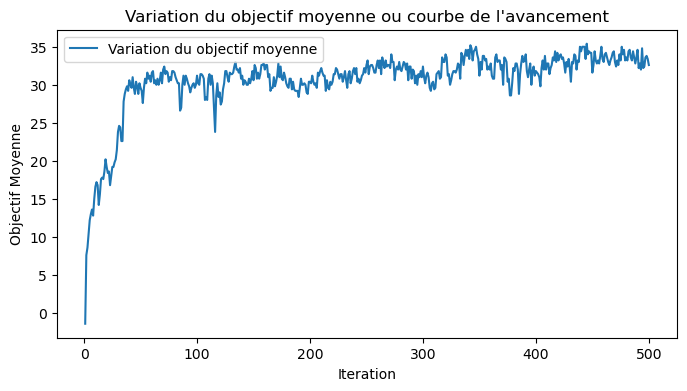

Process complete!


[array([9, 9, 0, 0, 9, 9, 1, 0]),
 array([9, 9, 0, 3, 9, 9, 0, 0]),
 array([9, 9, 0, 0, 0, 9, 0, 0])]

In [169]:

algorithm_genetic(X, 500, 3, 0.8, 0.3)

X[:5]